In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
wine_price=pd.read_csv("wine_sales_data.csv",sep=",")
wine_price.drop(["designation","region_1","region_2","description"],axis=1,inplace=True,errors="ignore")

In [2]:
our_wines=(wine_price.loc[(wine_price["country"]=="Portugal")&(wine_price["province"]=="Vinho Verde")])
our_wines.drop(["country","province","Unnamed: 0"],axis=1,inplace=True,errors="ignore")
q1=our_wines["price"].quantile(0.25)
q3=our_wines["price"].quantile(0.75)
iqr=q3-q1
our_wines=our_wines[((our_wines["price"]>(q1-1.5*iqr)) & (our_wines["price"]<q3+1.5*iqr))]

C:\Users\giorg\AppData\Local\Temp/ipykernel_15204/2634661552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  our_wines.drop(["country","province","Unnamed: 0"],axis=1,inplace=True,errors="ignore")


In [37]:
#The price dataset we hace contains a very small portion of Vinho Verde wines, and is of unknown date. Our wine dataset is from 2012. 
#To be able to draw conclusions about price-quality relationship, we divide them in quality labels, aiming for a distribution 
#similar to the one in our original dataset
our_wines["quality_label"]=our_wines["points"].apply(lambda value: "low" if value<=84 else "medium" if value<=89 else "high")
our_wines["quality_label"].value_counts()

medium    177
low        80
high       39
Name: quality_label, dtype: int64

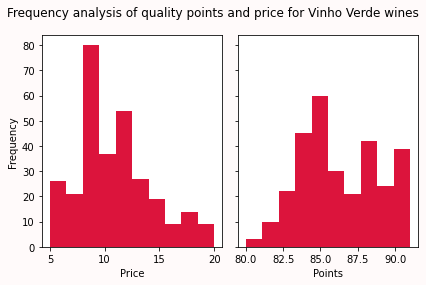

In [25]:
fig, axes = plt.subplots(1,2, sharey=True, squeeze=True, facecolor="snow")
our_wines["price"].plot(kind='hist',bins=10,ax=axes[0],color=["crimson"]); axes[0].set_xlabel("Price")
our_wines["points"].plot(kind='hist',bins=10,ax=axes[1],color=["crimson"]); axes[1].set_xlabel("Points")
plt.suptitle("Frequency analysis of quality points and price for Vinho Verde wines",fontsize=12)
plt.tight_layout()

Text(0.5, 1.0, 'Quality label distribution')

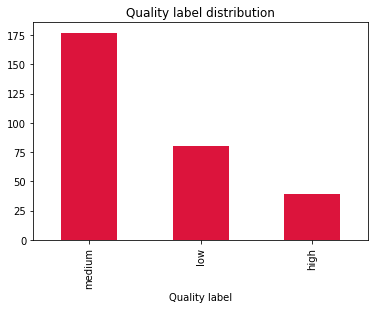

In [49]:
tempr=pd.DataFrame(data={"quality_label":["low","medium","high"],"count":our_wines.value_counts(subset="quality_label")})
#tempr["count"]=preprocessing.minmax_scale(tempr["count"], feature_range=(0.1, 1))
tempr["count"].plot(kind='bar',color=["crimson"])
plt.xlabel("Quality label")
plt.title("Quality label distribution")

In [59]:
lw=(our_wines.loc[(our_wines["quality_label"]=="low")])
mw=(our_wines.loc[(our_wines["quality_label"]=="medium")])
hw=(our_wines.loc[(our_wines["quality_label"]=="high")])

10.937853107344633

In [71]:
conl=lw.describe().applymap("{:.2f}".format).drop(["points"],axis=1)
conm=mw.describe().applymap("{:.2f}".format).drop(["points"],axis=1)
conh=hw.describe().applymap("{:.2f}".format).drop(["points"],axis=1)
keys=["Low","Medium","High"]
price_ran=pd.concat((conl,conm,conh),axis=1, keys=keys)
price_ran

,Low,Medium,High
,price,price,price
count,80.00,177.00,39.00
mean,8.04,10.94,15.26
std,2.00,2.85,3.17
min,5.00,6.00,9.00
25%,6.75,9.00,13.00
50%,8.00,11.00,16.00
75%,9.00,12.00,17.50
max,13.00,20.00,20.00
